## Final Project Submission

Please fill out:
* Student name: MUTISYA FAITH MWENDE
* Student pace: part-time
* Scheduled project review date/time: 03/06/2024
* Instructor name: SAMUEL G.
* Blog post URL:


In [304]:
# Your code here - remember to use markdown cells for comments as well!

# Problem Statement


Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create 

# Business understanding

Microsoft intends to venture into the entertainment industry by launching a new movie studio. In a highly competitive market, it is important to understand the type of films that are currently performing well at the box office.

This project aims to provide actionable insights based on analyzing various movie datasets from sources such as IMDb, Box Office Mojo, Rotten Tomatoes, TheMoviesDB, and The Numbers. By studying the trends in the various movie genres, box office revenue, and audience ratings, we will be able to identify key factors that contribute to the success of a film. 

The ultimate goal is to guide Microsoft's strategic decision in film production, ensuring that the new movie studio focuses on creating movies with high profit margins and audience engagement. 

This project will deliver three concrete business recommendations through comprehensive data analysis and clear visualizations ns that will help Microsoft establish a strong foothold in the movie industry.

# Data Understanding

## Data Source and Relevance

#### IMDb Database
• Provides detailed movie information in a SQLite format.
• Includes user ratings for audience reception and popularity assessment.
• Essential for analyzing financial success and identifying commercially viable genres and release strategies.

#### Box Office Mojo:
• Provides information about domestic and foreign gross revenues of movies.
• Tracks box office performance, essential for analyzing financial success.
• Helps identify commercially viable genres and release strategies.

#### Data Properties:
• Includes movie_basics and movie_ratings, with a size of approximately 146,000 records and 85,000 records respectively.
• Includes descriptive statistics such as genres, average ratings, and votes.
• Includes columns like title, domestic_gross, foreign_gross, total_gross, and mean, median, and range of t#### otal grosses.

#### Justification of Feature Inclusion:
• Understanding genres helps identify which films Microsoft should focus on producing.
• Average ratings and votes indicate well-received movies, guiding quality and content decisions.
• Gross revenues help determine the financial viability of different genres and release strategies.

#### Limitations of Data:
• Potential bias in IMDb data.
• Incomplete genre information in some movies.
• Missing data in Box Office Mojo data.

# DATA ANALYSIS

This section aims to find a deeper insight into the movie datasets (refer to data understanding) that will assist Microsoft's New movie studio to make informed decisions regarding the movies they produce. With help from IMDb and Box Office Mojo, I will investigate major factors which include the financial implications of the industry, the popularity of genres, and audience ratings. I will dervive actionable findings that will transform into Microsoft's strategic recommendations.

This section will also include visuals and statistical methods.

In [305]:
import os

# Print the current working directory
print(os.getcwd())

# List the files in the current working directory
print(os.listdir('.'))

C:\Users\Mwende\OneDrive\Desktop\PROJECTS\dsc-phase-1-project-v2-4
['.canvas', '.git', '.gitignore', '.ipynb_checkpoints', 'awesome.gif', 'CONTRIBUTING.md', 'im.db', 'index.ipynb', 'LICENSE.md', 'movie_data_erd.jpeg', 'README.md', 'student.ipynb', 'Untitled.ipynb', 'unzippedData', 'zippedData']


In [306]:
import pandas as pd
import sqlite3

In [307]:
#connecting to IMDb SQLite database
conn=sqlite3.connect('zippedData/im.db')

In [308]:
# SQL query to list tables in the SQLite database
query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query and fetch the results
tables = conn.execute(query).fetchall()


In [309]:
# Print the table names
if tables:
    for table in tables:
        print(table[0])
else:
    print("No tables found in database.")

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [310]:
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Load the Box Office Mojo data from the compressed CSV file
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')

# Display the first few rows of each DataFrame
print("Movie Basics:")
print(movie_basics.head())
print("\nMovie Ratings:")
print(movie_ratings.head())
print("\nBox Office Mojo Movie Gross:")
print(bom_movie_gross.head())

Movie Basics:
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  

Movie Ratings:
     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726        

In [311]:
import os
import pandas as pd

# Define the path to the 'zippedData' directory
zipped_data_path = os.path.join(os.getcwd(), 'zippedData')

# Load Box Office Mojo data
bom_file = 'bom.movie_gross.csv.gz'
bom_movie_gross = pd.read_csv(os.path.join(zipped_data_path, bom_file))

# Clean Box Office Mojo data
bom_movie_gross = bom_movie_gross.rename(columns=lambda x: x.strip())  # Remove any leading/trailing whitespace in column names
bom_movie_gross = bom_movie_gross.dropna(subset=['domestic_gross', 'foreign_gross'])  # Drop rows with missing gross revenue data
bom_movie_gross['domestic_gross'] = bom_movie_gross['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)  # Convert domestic gross to float
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)  # Convert foreign gross to float
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']  # Calculate total gross

# Display cleaned Box Office Mojo data
print("\nCleaned Box Office Mojo Data:")
print(bom_movie_gross.head())



Cleaned Box Office Mojo Data:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

   foreign_gross  year   total_gross  
0    652000000.0  2010  1.067000e+09  
1    691300000.0  2010  1.025500e+09  
2    664300000.0  2010  9.603000e+08  
3    535700000.0  2010  8.283000e+08  
4    513900000.0  2010  7.526000e+08  


In [312]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("\nTables in IMDb Database:")
print(tables)


Tables in IMDb Database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [313]:
# Define the path to the SQLite database
db_path = os.path.join(zipped_data_path, 'im.db')

try:
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)

    # Check available tables
    tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
    print("\nTables in IMDb Database:")
    print(tables)

    # Load tables if they exist
    if 'movie_basics' in tables['name'].values and 'movie_ratings' in tables['name'].values:
        movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
        movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
        
        # Merge IMDb data
        imdb_data = pd.merge(movie_basics, movie_ratings, on='tconst')
        
        # Display merged IMDb data
        print("\nMerged IMDb Data:")
        print(imdb_data.head())
    else:
        print("\nOne or both of the tables 'movie_basics' and 'movie_ratings' do not exist in the database.")
except Exception as e:
    print("\nAn error occurred:", e)
    print("One or both of the tables 'movie_basics' and 'movie_ratings' do not exist in the database.")
finally:
    # Close the connection
    if 'conn' in locals():
        conn.close()


Tables in IMDb Database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers

An error occurred: 'tconst'
One or both of the tables 'movie_basics' and 'movie_ratings' do not exist in the database.


In [314]:
# Load IMDb data from a TSV file (e.g., 'imdb.title.basics.tsv.gz')
imdb_file = 'rt.movie_info.tsv.gz'
imdb_data = pd.read_csv(os.path.join(zipped_data_path, imdb_file), sep='\t', low_memory=False)

# Clean IMDb data (basic cleaning for demonstration purposes)
imdb_data = imdb_data.rename(columns=lambda x: x.strip())  # Remove any leading/trailing whitespace in column names

# Display IMDb data
print("\nIMDb Data:")
print(imdb_data.head())

# Print the columns of both datasets to identify common columns
print("Box Office Mojo Data Columns:", bom_movie_gross.columns)
print("IMDb Data Columns:", imdb_data.columns)

# Example: Matching Box Office Mojo titles with IMDb titles (using 'title' column in Box Office Mojo and possible 'original_title' in IMDb)
# We will print the first few rows of IMDb data to find a suitable column

print(imdb_data.head())

# If there is no 'title' column in IMDb data, we need to find the closest matching column

# Assuming 'title' and 'original_title' are the columns to match
if 'title' in bom_movie_gross.columns and 'original_title' in imdb_data.columns:
    # Define a function to match titles using fuzzy matching
    def match_titles(bom_title, imdb_titles, threshold=90):
        match = process.extractOne(bom_title, imdb_titles, score_cutoff=threshold)
        return match[0] if match else None

    # Apply fuzzy matching to create a mapping of Box Office Mojo titles to IMDb titles
    bom_movie_gross['imdb_title'] = bom_movie_gross['title'].apply(lambda x: match_titles(x, imdb_data['original_title']))

    # Merge datasets based on the fuzzy matched titles
    merged_data = pd.merge(bom_movie_gross, imdb_data, left_on='imdb_title', right_on='original_title', how='inner')

    # Display merged data
    print("\nMerged Data:")
    print(merged_data.head())
else:
    print("No suitable columns found for merging. Please inspect the datasets for common keys.")



IMDb Data:
   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   

In [315]:
print(bom_movie_gross.columns)
print(imdb_data.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'total_gross'],
      dtype='object')
Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


In [316]:
merged_data = pd.merge(bom_movie_gross, imdb_data, on='studio', how='inner')


In [317]:
# Split genres column and expand dataset
genres_expanded = imdb_data['genre'].str.split('|', expand=True)

# Concatenate the expanded genres dataframe with the original dataframe
imdb_data_expanded = pd.concat([imdb_data, genres_expanded], axis=1)

# Rename the columns for clarity
imdb_data_expanded.columns.values[0] = 'id'
imdb_data_expanded.rename(columns={0: 'genre_1', 1: 'genre_2', 2: 'genre_3'}, inplace=True)

# Display the expanded dataset
print(imdb_data_expanded.head())


   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2          

In [318]:
print(imdb_data_expanded.columns)


Index([          'id',     'synopsis',       'rating',        'genre',
           'director',       'writer', 'theater_date',     'dvd_date',
           'currency',   'box_office',      'runtime',       'studio',
            'genre_1',      'genre_2',      'genre_3',              3,
                    4,              5,              6],
      dtype='object')


In [319]:
# Calculate descriptive statistics for 'box_office' and 'runtime'
descriptive_stats = imdb_data_expanded[['box_office', 'runtime']].describe()

# Display descriptive statistics
print(descriptive_stats)


       box_office     runtime
count         340        1530
unique        336         142
top       600,000  90 minutes
freq            2          72


C:\Users\Mwende\AppData\Local\Temp\ipykernel_21332\4264609149.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad=0.01)


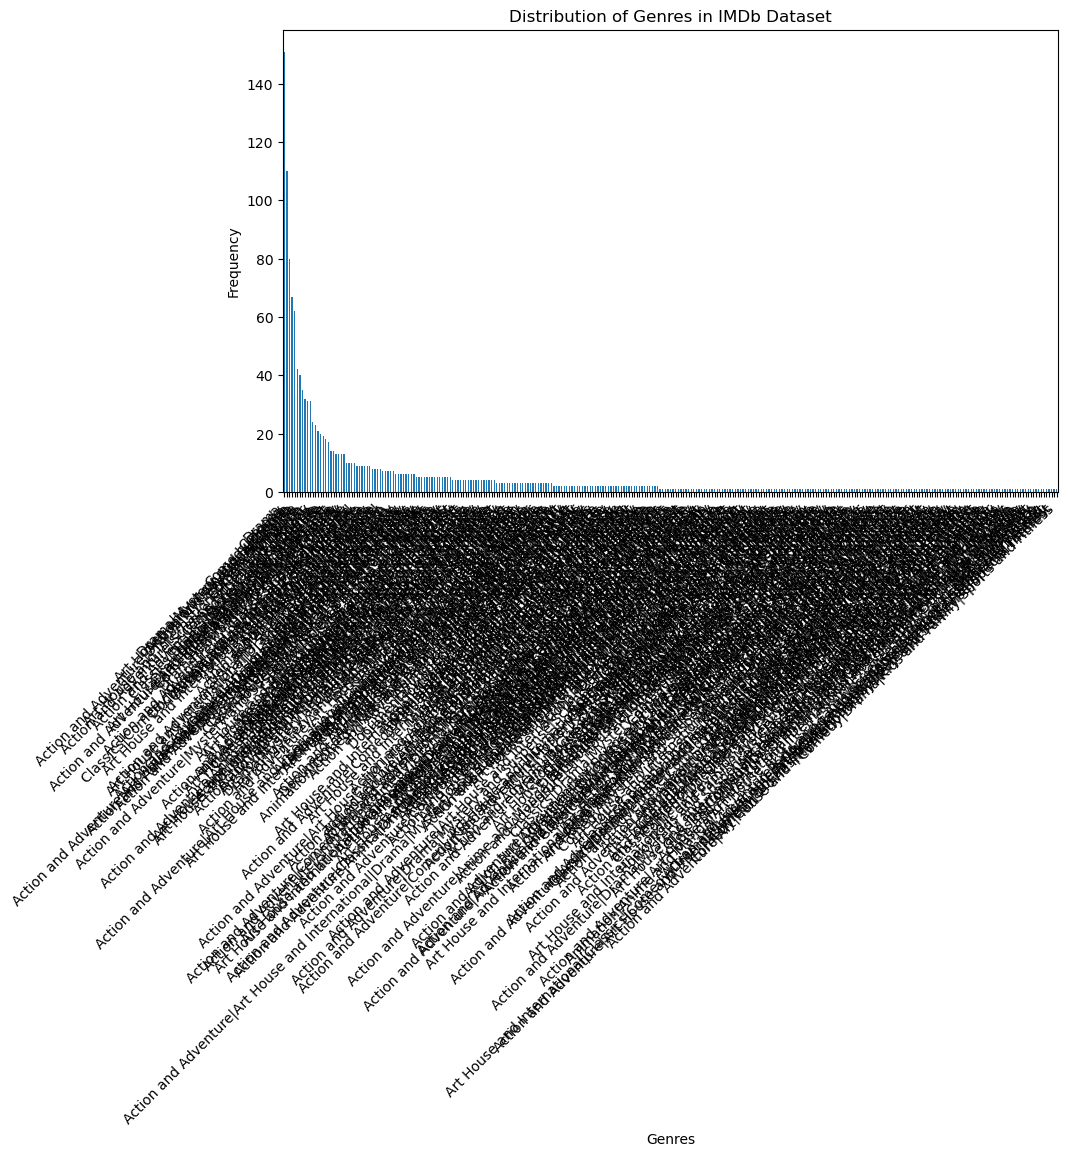

In [320]:
import matplotlib.pyplot as plt

# Count the occurrences of each genre
genre_counts = imdb_data_expanded['genre'].value_counts()

# Plotting the distribution of genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Genres in IMDb Dataset')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=0.01) 
plt.show()


In [321]:
# Convert 'box_office' column to numeric type
imdb_data_expanded['box_office'] = pd.to_numeric(imdb_data_expanded['box_office'], errors='coerce')

# Convert 'rating' column to numeric type
imdb_data_expanded['rating'] = pd.to_numeric(imdb_data_expanded['rating'], errors='coerce')


In [322]:
# Calculate average box office gross and IMDb rating by genre
genre_stats = imdb_data_expanded.groupby('genre').agg({'box_office': 'mean', 'rating': 'mean'})

# Sort the genres by average box office gross in descending order
genre_stats = genre_stats.sort_values(by='box_office', ascending=False)

# Display the genre_stats DataFrame
print(genre_stats)


                                                    box_office  rating
genre                                                                 
Documentary|Special Interest|Television                  363.0     NaN
Action and Adventure                                       NaN     NaN
Action and Adventure|Animation|Art House and In...         NaN     NaN
Action and Adventure|Animation|Classics|Comedy|...         NaN     NaN
Action and Adventure|Animation|Comedy                      NaN     NaN
...                                                        ...     ...
Science Fiction and Fantasy                                NaN     NaN
Science Fiction and Fantasy|Romance                        NaN     NaN
Special Interest                                           NaN     NaN
Special Interest|Sports and Fitness                        NaN     NaN
Western                                                    NaN     NaN

[299 rows x 2 columns]
